In [57]:
def distribute_uniformly(total_demand, N):
    demand_per_item = total_demand / N
    uniform_distribution = {i: demand_per_item for i in range(N)}
    return uniform_distribution

def distribute_lowly_concentrated(total_demand, N, k):
    demand_per_item = []
    total_powers = sum([i ** -k for i in range(1, N + 1)])
    for i in range(1, N + 1):
        demand = (total_demand / total_powers) * (i ** -k)
        demand_per_item.append(demand)
    lowly_concentrated_distribution = {i: demand for i, demand in enumerate(demand_per_item)}
    return lowly_concentrated_distribution

def distribute_highly_concentrated(total_demand, N, alpha):
    demand_per_item = []
    C = total_demand * (alpha - 1) / (alpha ** alpha)
    for i in range(1, N + 1):
        demand = C / (i ** alpha)
        demand_per_item.append(demand)

    # Normalize demands to match the total demand
    total_calculated_demand = sum(demand_per_item)
    normalization_factor = total_demand / total_calculated_demand
    normalized_demand_per_item = [demand * normalization_factor for demand in demand_per_item]
    
    highly_concentrated_distribution = {i: demand for i, demand in enumerate(normalized_demand_per_item)}
    return highly_concentrated_distribution

# Example usage
total_demand = 25000/250
N = 2
k_low = 0.5
alpha_high = 1.5

uniform_distribution = distribute_uniformly(total_demand, N)
lowly_concentrated_distribution = distribute_lowly_concentrated(total_demand, N, k_low)
highly_concentrated_distribution = distribute_highly_concentrated(total_demand, N, alpha_high)

print("Uniform Distribution:", uniform_distribution)
print("Lowly Concentrated Distribution:", lowly_concentrated_distribution)
print("Highly Concentrated Distribution:", highly_concentrated_distribution)


Uniform Distribution: {0: 50.0, 1: 50.0}
Lowly Concentrated Distribution: {0: 58.5786437626905, 1: 41.42135623730951}
Highly Concentrated Distribution: {0: 73.87961250362586, 1: 26.120387496374143}


100.0

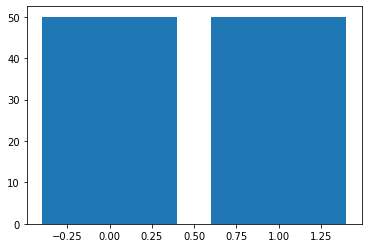

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(uniform_distribution)), uniform_distribution.values()) 
np.sum(list(uniform_distribution.values()))

100.0

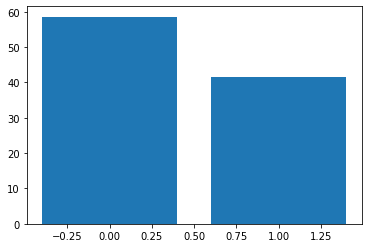

In [59]:

plt.bar(np.arange(len(lowly_concentrated_distribution)), lowly_concentrated_distribution.values()) 
np.sum(list(lowly_concentrated_distribution.values()))


100.0

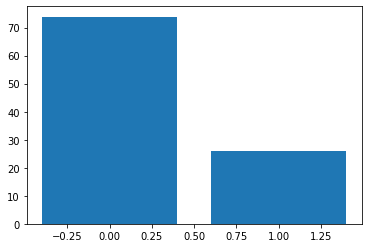

In [60]:

plt.bar(np.arange(len(highly_concentrated_distribution)), highly_concentrated_distribution.values()) 
np.sum(list(highly_concentrated_distribution.values()))